# Ford GoBike System Data
## by Assemgul Kaiyrzhan

## Investigation Overview

> In this study, I will try to provide the necessary visualizations between some interesting variables to see their effect on other variables such as Trip duration.

## Dataset Overview

> This dataset includes information on individual 2017 rides made on a bike-sharing system spanning greater San Francisco.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from datetime import datetime
%matplotlib inline

In [2]:
# load in the dataset into a pandas dataframe
df_clean = pd.read_csv('df_clean.csv')

## Trip Duration (sec)

> If we take a closer look at duration_sec, then we see that it is constantly transferred to the left side, and if we do a full transformation, we will see that the duration_sec was skweed and had many points; a massive transformation was required. Most of the glasses were under 25 minutes.

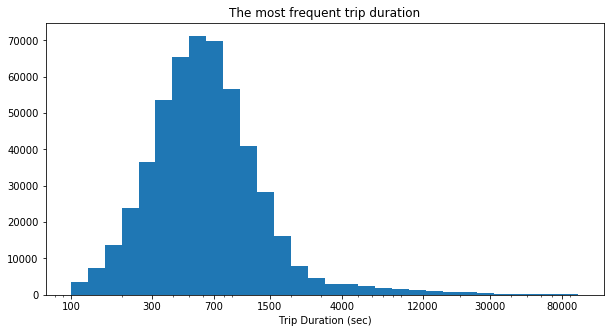

In [10]:
bins = 10 ** np.arange(2, 5.0 + 0.1, 0.1) 
plt.figure(figsize=[10, 5])
plt.hist(data=df_clean, x='duration_sec', bins=bins)
ticks = [100, 300, 700 , 1500, 4000, 12000, 30000, 80000]
labels = ['{}'.format(val) for val in ticks]
plt.xscale('log')
plt.xticks(ticks, labels)
plt.xlabel('Trip Duration (sec)')
plt.title('The most frequent trip duration')
plt.show();

## Number of trip in diffrent months

> According to the trips in months, we will notice that in October we have a large number of trips, the least number of trips we have in June.

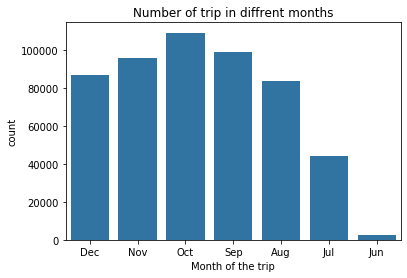

In [11]:
sb.countplot(data=df_clean, x='Month', color=sb.color_palette()[0]);
plt.xlabel('Month of the trip')
plt.title('Number of trip in diffrent months');

## Number of trip in diffrent Days

> If we consider the trips by days of the week, we will notice that on Wednesday and Tuesday the same number of trips, the least on Sunday

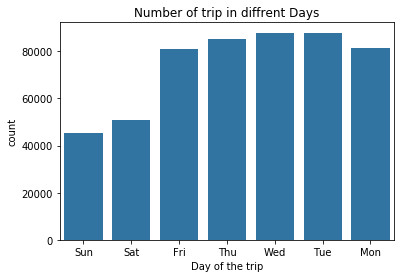

In [12]:
sb.countplot(data=df_clean, x='Day', color=sb.color_palette()[0]);
plt.xlabel('Day of the trip')
plt.title('Number of trip in diffrent Days');

## Top 10 stations for the trips

> Top 1 of station it's The Embaracadero at Sansome St

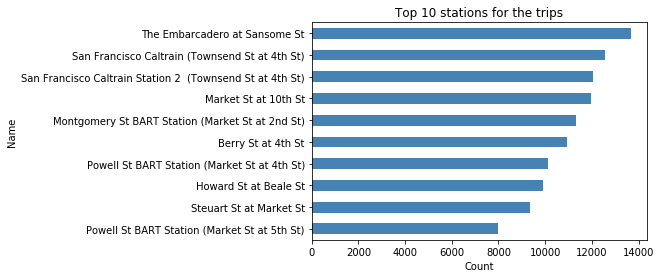

In [15]:
top_names = df_clean.start_station_name.value_counts()[1:11].sort_values()
top_names.plot(kind = 'barh', color='steelblue')
plt.title('Top 10 stations for the trips')
plt.xlabel('Count')
plt.ylabel('Name');

## Duration and Distance

> If we look at the duration and distance, correlation between these two variables is low, indicating a false expectation.

Text(0.5, 1, 'Duration and Distance')

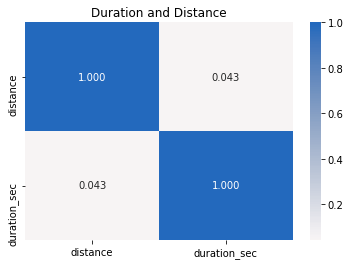

In [4]:
sb.heatmap(df_clean[['distance', 'duration_sec']].corr(), annot = True, fmt = '.3f',cmap = 'vlag_r', center = 0);
plt.title('Duration and Distance')

## Average Trip Distance per User Group

> If we look at the columns by user type and average of distance, we only see a small difference between them - 0,000458

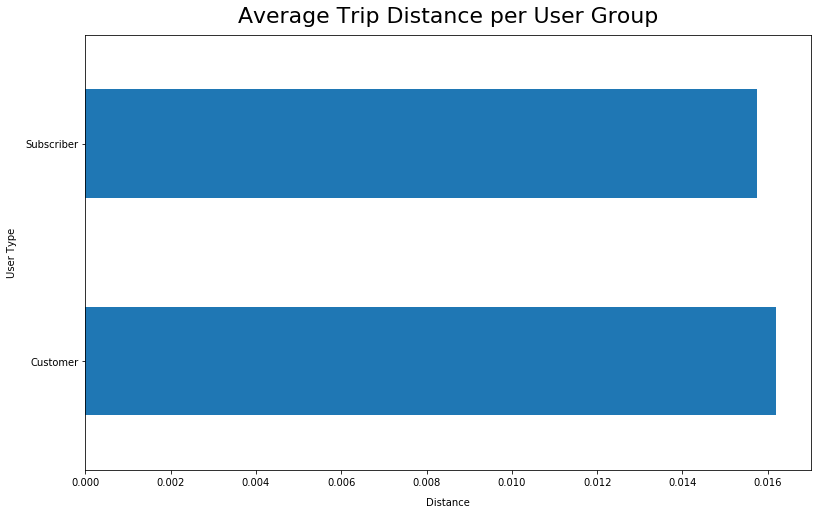

In [20]:
ax = df_clean.groupby('user_type')['distance'].mean().plot(kind='barh', figsize=(13,8))
ax.set_title('Average Trip Distance per User Group', fontsize=22, y=1.015)
ax.set_ylabel('User Type', labelpad=8)
ax.set_xlabel('Distance', labelpad=10);

## Trip duartion across user type in different months/weeks/hours

> Trip duration in different months/days/hours, given the type of user, we now see that the Client has a much higher average trip duration.

> If we look at the type of user during the month of the trip, we really don't see any pattern with the other type of user.

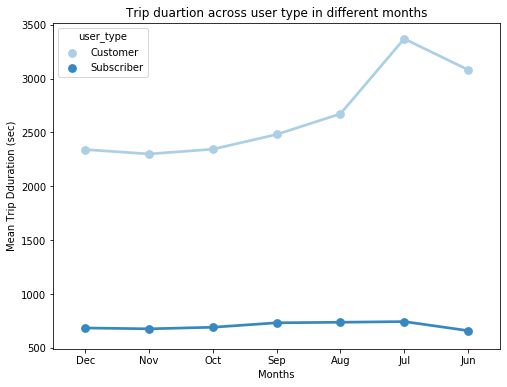

In [21]:
fig = plt.figure(figsize = [8,6])
sb.pointplot(data = df_clean, x = 'Month', y = 'duration_sec', hue = 'user_type', palette = 'Blues', ci=None)
plt.title('Trip duartion across user type in different months')
plt.ylabel('Mean Trip Dduration (sec)')
plt.xlabel('Months')
plt.show();

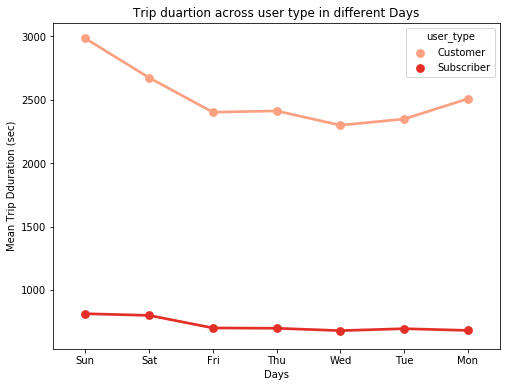

In [22]:
fig = plt.figure(figsize = [8,6])
sb.pointplot(data = df_clean, x = 'Day', y = 'duration_sec', hue = 'user_type', palette = 'Reds', ci=None)
plt.title('Trip duartion across user type in different Days')
plt.ylabel('Mean Trip Dduration (sec)')
plt.xlabel('Days')
plt.show();

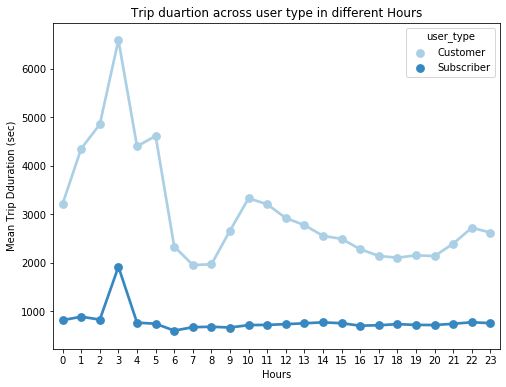

In [23]:
fig = plt.figure(figsize = [8,6])
sb.pointplot(data = df_clean, x = 'Hour', y = 'duration_sec', hue = 'user_type', palette = 'Blues', ci=None)
plt.title('Trip duartion across user type in different Hours')
plt.ylabel('Mean Trip Dduration (sec)')
plt.xlabel('Hours')
plt.show();

> Once you're ready to finish your presentation, check your output by using
nbconvert to export the notebook and set up a server for the slides. From the
terminal or command line, use the following expression:
> > jupyter nbconvert slide_deck_template.ipynb --to slides --post serve --template output_toggle

> This should open a tab in your web browser where you can scroll through your
presentation. Sub-slides can be accessed by pressing 'down' when viewing its parent
slide. Make sure you remove all of the quote-formatted guide notes like this one
before you finish your presentation!